# Préparation des données

In [1]:
import pandas as pd

df = pd.read_csv('./../test_rag/text_embeddings.csv')
df

,embedding,text
0,"[-0.0511474609375, 0.00971221923828125, 0.0586...",product_name wayona nylon braided usb lightnin...
1,"[-0.025787353515625, 0.0024566650390625, 0.029...",product_name ambrane unbreakable 60w 3a fast c...
2,"[-0.034698486328125, 0.033538818359375, 0.0403...",product_name sounce fast phone charging cable ...
3,"[-0.023162841796875, 0.00914764404296875, 0.03...",product_name boat deuce usb 300 2 1 typec micr...
4,"[-0.046478271484375, 0.0257110595703125, 0.028...",product_name portronics konnect l 12m fast cha...
...,...,...
1460,"[-0.0394287109375, 0.004497528076171875, 0.048...",product_name noir aqua 5pcs pp spun filter 1 s...
1461,"[-0.03570556640625, -0.002613067626953125, 0.0...",product_name prestige delight prwo electric ri...
1462,"[-0.0236053466796875, 0.0194091796875, 0.00481...",product_name bajaj majesty rx10 2000 watt heat...
1463,"[-0.0458984375, 0.0092926025390625, 0.03536987...",product_name havells ventil air dsp 230mm exha...


In [2]:
def str_to_list_float(s):
    return list(map(float, s[1:-1].split(',')))

Passe des str à des list de flotants

In [3]:
df["embedding"] = df["embedding"].apply(str_to_list_float)
print(type(df["embedding"][0]), type(df["embedding"][0][0]))

<class 'list'> <class 'float'>


# Algo de clustering

Méthode du coude

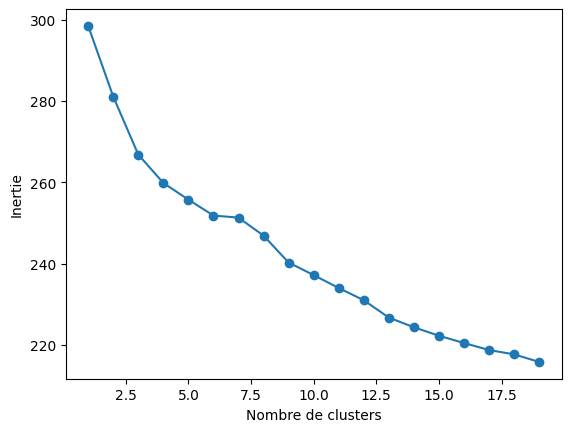

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df["embedding"].to_list())
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 20), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Méthode de silhouette

Score de silhouette pour 2 clusters : 0.06537852709011856
Score de silhouette pour 3 clusters : 0.0627887174062341
Score de silhouette pour 4 clusters : 0.07001456959028285
Score de silhouette pour 5 clusters : 0.06371655681651843
Score de silhouette pour 6 clusters : 0.06217241006109485
Score de silhouette pour 7 clusters : 0.04084901439907506
Score de silhouette pour 8 clusters : 0.04780971674549431
Score de silhouette pour 9 clusters : 0.05865528309870105
Score de silhouette pour 10 clusters : 0.05604056945920564
Score de silhouette pour 11 clusters : 0.05768248383083694
Score de silhouette pour 12 clusters : 0.06343073821298321
Score de silhouette pour 13 clusters : 0.06651356574105625
Score de silhouette pour 14 clusters : 0.06804145488865779
Score de silhouette pour 15 clusters : 0.06968149822532847
Score de silhouette pour 16 clusters : 0.07320759942753344
Score de silhouette pour 17 clusters : 0.07538280862045262
Score de silhouette pour 18 clusters : 0.07524492439755745
Score 

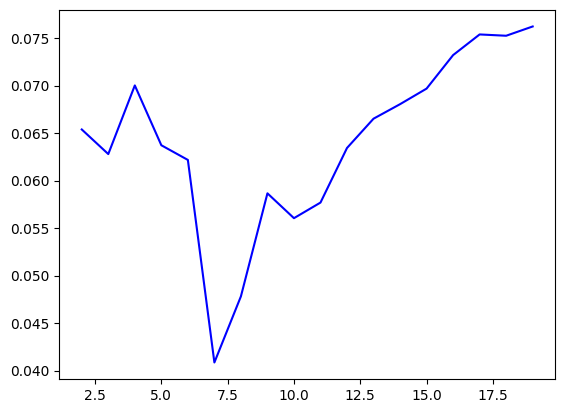

In [5]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df["embedding"].tolist())
    score = silhouette_score(df["embedding"].tolist(), labels)
    print(f"Score de silhouette pour {k} clusters : {score}")
    scores.append(score)

plt.plot([k for k in range(2,20)], scores, color='blue')
plt.show()

K-mean

In [6]:
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df["embedding"].tolist())

# Analyse des clusters

c:\Users\simon\Documents\VSC\Mistral_hackathon\quantum-black-hackathon\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


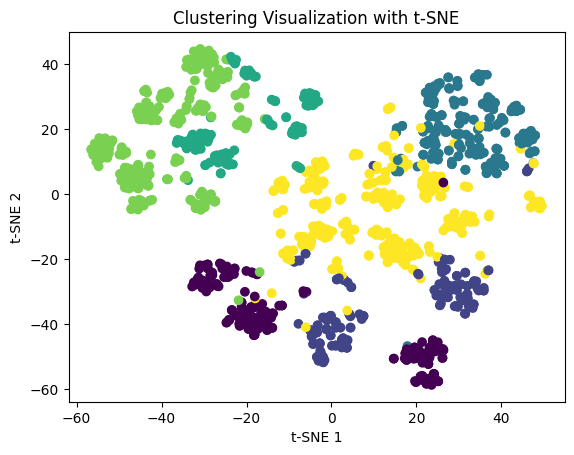

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Appliquer t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_data_tsne = tsne.fit_transform(np.array(df['embedding'].tolist()))

# Ajouter les composantes t-SNE au DataFrame
df['tsne1'] = reduced_data_tsne[:, 0]
df['tsne2'] = reduced_data_tsne[:, 1]

# Visualisation des clusters avec t-SNE
plt.scatter(df['tsne1'], df['tsne2'], c=df['cluster'], cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Clustering Visualization with t-SNE')
plt.show()


c:\Users\simon\Documents\VSC\Mistral_hackathon\quantum-black-hackathon\venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


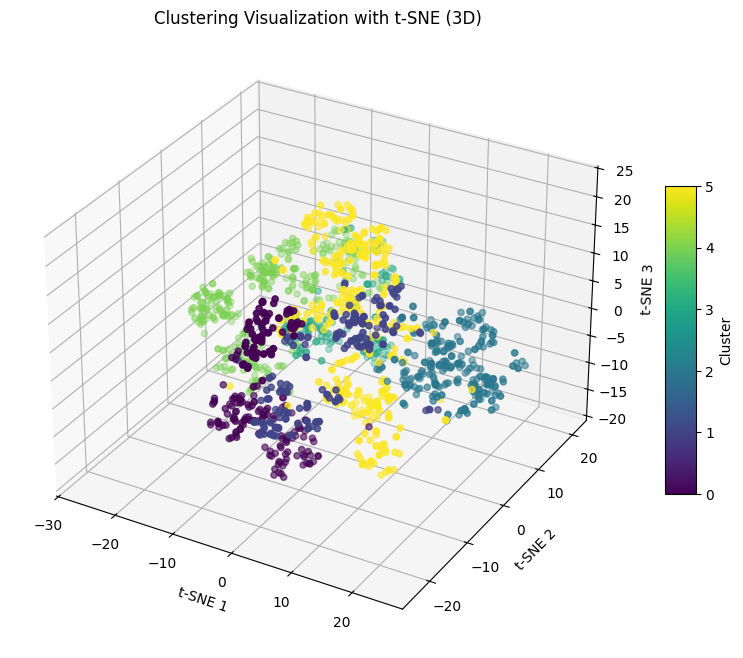

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import nécessaire pour la visualisation 3D
import numpy as np

# Appliquer t-SNE en 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
reduced_data_tsne = tsne.fit_transform(np.array(df["embedding"].tolist()))

# Ajouter les composantes t-SNE au DataFrame
df['tsne1'] = reduced_data_tsne[:, 0]
df['tsne2'] = reduced_data_tsne[:, 1]
df['tsne3'] = reduced_data_tsne[:, 2]

# Visualisation des clusters en 3D avec t-SNE
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['tsne1'], df['tsne2'], df['tsne3'], c=df['cluster'], cmap='viridis')

# Ajouter des labels et une légende
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('Clustering Visualization with t-SNE (3D)')

# Ajouter une barre de couleurs pour représenter les clusters
legend = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
legend.set_label('Cluster')

plt.show()


In [15]:
df

,embedding,text,cluster,tsne1,tsne2,tsne3
0,"[-0.0511474609375, 0.00971221923828125, 0.0586...",product_name wayona nylon braided usb lightnin...,2,13.160619,12.244044,-8.194115
1,"[-0.025787353515625, 0.0024566650390625, 0.029...",product_name ambrane unbreakable 60w 3a fast c...,2,23.375896,4.876938,-4.001832
2,"[-0.034698486328125, 0.033538818359375, 0.0403...",product_name sounce fast phone charging cable ...,2,10.332530,12.313462,-6.165184
3,"[-0.023162841796875, 0.00914764404296875, 0.03...",product_name boat deuce usb 300 2 1 typec micr...,2,17.610891,1.021673,3.736569
4,"[-0.046478271484375, 0.0257110595703125, 0.028...",product_name portronics konnect l 12m fast cha...,2,13.354597,12.712713,-0.075169
...,...,...,...,...,...,...
1460,"[-0.0394287109375, 0.004497528076171875, 0.048...",product_name noir aqua 5pcs pp spun filter 1 s...,4,-16.622185,-4.423517,2.560944
1461,"[-0.03570556640625, -0.002613067626953125, 0.0...",product_name prestige delight prwo electric ri...,4,-16.604010,11.968108,2.891221
1462,"[-0.0236053466796875, 0.0194091796875, 0.00481...",product_name bajaj majesty rx10 2000 watt heat...,4,-20.826639,-0.230463,-7.634191
1463,"[-0.0458984375, 0.0092926025390625, 0.03536987...",product_name havells ventil air dsp 230mm exha...,4,-15.583678,0.585039,-14.025024


In [ ]:
df.columns
new_order = ["cluster", "embedding", "text","tsne1", "tsne2", "tsne3"]
df = df[new_order]

In [23]:
df.drop(columns=["embedding"]).to_csv('./../test_rag/text_embeddings_clusters.csv', index=False)

In [ ]:
full_df = pd.read_csv('./../test_rag/amazon.csv')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,stock
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,90
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,93
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,120
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,93
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,100
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got eve

In [29]:
new_df = pd.concat([full_df, df], axis=1)
order = ['cluster','product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'stock',
       'embedding', 'text', 'tsne1', 'tsne2', 'tsne3']
new_df = new_df[order]
new_df

,cluster,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,...,review_title,review_content,img_link,product_link,stock,embedding,text,tsne1,tsne2,tsne3
0,2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,90,"[-0.0511474609375, 0.00971221923828125, 0.0586...",product_name wayona nylon braided usb lightnin...,13.160619,12.244044,-8.194115
1,2,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...",...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,93,"[-0.025787353515625, 0.0024566650390625, 0.029...",product_name ambrane unbreakable 60w 3a fast c...,23.375896,4.876938,-4.001832
2,2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,120,"[-0.034698486328125, 0.033538818359375, 0.0403...",product_name sounce fast phone charging cable ...,10.332530,12.313462,-6.165184
3,2,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,93,"[-0.023162841796875, 0.00914764404296875, 0.03...",product_name boat deuce usb 300 2 1 typec micr...,17.610891,1.021673,3.736569
4,2,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,109,"[-0.046478271484375, 0.0257110595703125, 0.028...",product_name portronics konnect l 12m fast cha...,13.354597,12.712713,-0.075169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,...,"Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,100,"[-0.0394287109375, 0.004497528076171875, 0.048...",product_name noir aqua 5pcs pp spun filter 1 s...,-16.622185,-4.423517,2.560944
1461,4,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year",...,"ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,89,"[-0.03570556640625, -0.002613067626953125, 0.0...",product_name prestige delight pr

In [30]:
new_df.to_csv('./../test_rag/amazon_clusters.csv', index=False)